<a href="https://colab.research.google.com/github/TobiasSunderdiek/cartoon-gan/blob/master/CartoonGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CartoonGAN

This notebook contains the implementation of the cartoon GAN model. It is implemented with PyTorch.

## Generate dataset

### cartoons images

- Download cartoon images from kaggle to local computer as desribed in README of this project [here](https://github.com/TobiasSunderdiek/cartoon-gan/blob/master/README.md)
- upload generated file `safebooru.zip` to this colab notebook files directory by executing cell below

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Archiv.zip to Archiv.zip
User uploaded file "Archiv.zip" with length 2365337 bytes


- extract images and place in folder `cartoons` by executing cell below

In [4]:
!mkdir images
!mkdir /cartoons
!unzip safebooru.zip -d images/cartoons/ #extract to subfolder due to DataLoader needs subdirectories

Archive:  Archiv.zip
  inflating: images/cartoons/sample_ff16d6b22f7def168b0994481b89d90206a75a15.jpg  
  inflating: images/cartoons/sample_fe55cce05c65892893f99def546ef015acf2adcd.jpg  
  inflating: images/cartoons/sample_fe0b5ec5b975a15ac33f627f99143d969877e0ac.jpg  
  inflating: images/cartoons/sample_ff221fa2fa4e1b19f41ec9563c09fed28c4f011f.jpg  
  inflating: images/cartoons/sample_ffcdaa978cf51b9862e6e2b71ce078f5509fd9dc.jpg  
  inflating: images/cartoons/sample_ffa51496e27cbcfc525a8a3b7b779aed54f522c7.jpg  
  inflating: images/cartoons/sample_ff9bc67705c3008296fd7d3c6addd71063b5900e.jpg  
  inflating: images/cartoons/sample_fe97b71aa3d5bf700effaad33f1abf40d647b0d6.jpg  
  inflating: images/cartoons/sample_fe1d2d718dc7d5240eb7cbd4a3cb78f72f98aac4.jpg  
  inflating: images/cartoons/sample_ff30ba509a56ad71b987643c0a947c3fccecb854.jpg  
  inflating: images/cartoons/sample_fed650c7ef4210a37de628990e21e565d16662e0.jpg  


##### data-loader

As mentioned in the paper, the used image size is 256x256 pixel.

In [0]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms

data_dir = 'images/'
image_size = 256
batch_size = 25

transformer = transforms.Compose([
    transforms.CenterCrop(image_size),
    transforms.ToTensor()
])

cartoon_image_dataloader = DataLoader(ImageFolder(data_dir, transformer), batch_size, shuffle=True, num_workers=0)

#### show examples

torch.Size([3, 256, 256])


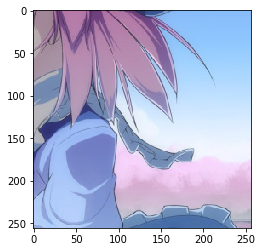

In [32]:
import matplotlib.pyplot as plt
import numpy as np

cartoon_image_iterator = iter(cartoon_image_dataloader)
sample_cartoon_image_batch, _ = cartoon_image_iterator.next()

first_sample_image_of_batch = sample_cartoon_image_batch[0]

print(first_sample_image_of_batch.size())

plt.imshow(np.transpose(first_sample_image_of_batch.numpy(), (1, 2, 0)))